# Chapter 6 : Visualization

# Matplotlib version and modules

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-20 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.0
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pandas as pd
import pydoc

print("Matplotlib version", mpl.__version__)

def clean(astr):
   s = astr
   # remove multiple spaces
   s = ' '.join(s.split())
   s = s.replace('=','')

   return s

def print_desc(prefix, pkg_path):
   for pkg in pu.iter_modules(path=pkg_path):
      name = prefix + "." + pkg[1]

      if pkg[2] == True:
         try:
            docstr = pydoc.plain(pydoc.render_doc(name))
            docstr = clean(docstr)
            start = docstr.find("DESCRIPTION")
            docstr = docstr[start: start + 140]
            print(name, docstr)
         except:
            continue

print("\n")
print_desc("matplotlib", mpl.__path__)

Matplotlib version 2.1.2


matplotlib.axes 
matplotlib.backends 
matplotlib.cbook DESCRIPTION A collection of utility functions and classes. Originally, many (but not all) were from the Python Cookbook -- hence the name cb
matplotlib.compat 
matplotlib.projections 
matplotlib.sphinxext 
matplotlib.style 
matplotlib.testing 
matplotlib.tri 


# Basic matplotlib plot

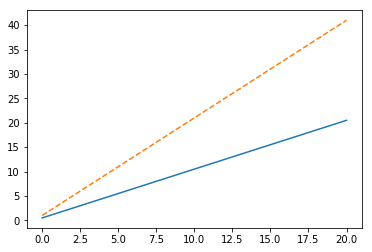

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20)

plt.plot(x,  .5 + x)
plt.plot(x, 1 + 2 * x, '--')
plt.show()

# Logarithmic plot

Poly [ 3.61559210e-01 -7.05783195e+02]


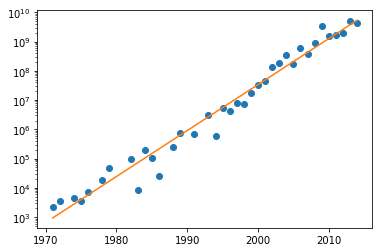

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
years = df.index.values
counts = df['trans_count'].values
poly = np.polyfit(years, np.log(counts), deg=1)
print("Poly", poly)
plt.semilogy(years, counts, 'o')
plt.semilogy(years, np.exp(np.polyval(poly, years)))
plt.show()

## Scatter Plots

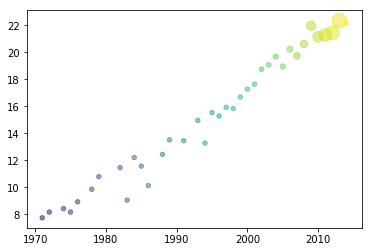

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values
cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5)
plt.show()

# Legends and annotaions

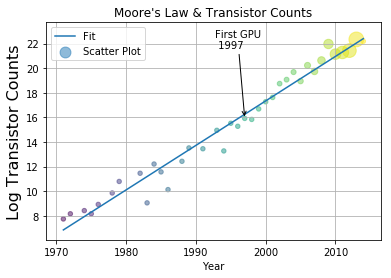

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values

poly = np.polyfit(years, np.log(counts), deg=1)
plt.plot(years, np.polyval(poly, years), label='Fit')

gpu_start = gpu.index.values.min()
y_ann = np.log(df.at[gpu_start, 'trans_count'])
ann_str = "First GPU\n %d" % gpu_start
plt.annotate(ann_str, xy=(gpu_start, y_ann), arrowprops=dict(arrowstyle="->"), xytext=(-30, +70), textcoords='offset points')

cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5, label="Scatter Plot")
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Log Transistor Counts", fontsize=16)
plt.title("Moore's Law & Transistor Counts")
plt.show()

# Three-dimensional plots

ValueError: Argument Z must be 2-dimensional.

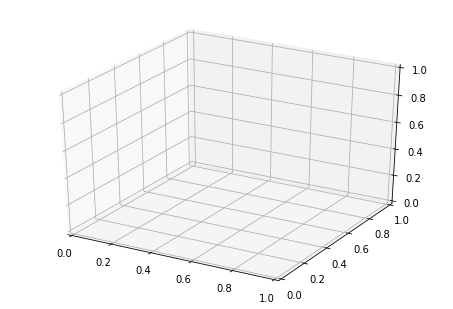

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)

fig = plt.figure()
ax = Axes3D(fig)
X = df.index.values

#Y = np.log(df['trans_count'].values)
Y = np.where(df['trans_count'].values>0, np.log(df['trans_count'].values), 0)
X, Y = np.meshgrid(X, Y)
#Z = np.log(df['gpu_trans_count'].values)
Z = np.where(df['gpu_trans_count'].values>0, np.log(df['gpu_trans_count'].values), 0)

ax.plot_surface(X, Y, Z)
ax.set_xlabel('Year')
ax.set_ylabel('Log CPU transistor counts')
ax.set_zlabel('Log GPU transistor counts')
ax.set_title("Moore's Law & Transistor Counts")
plt.show()

# plotting in pandas

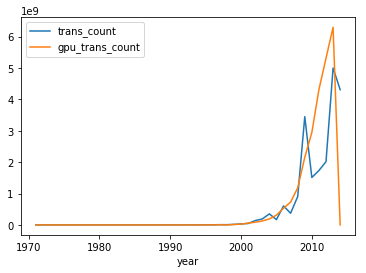

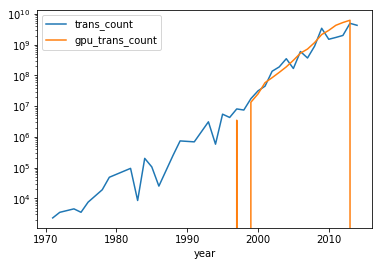

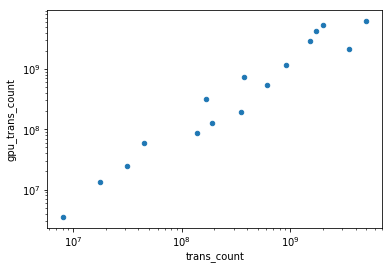

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, 
right_index=True)
df = df.replace(np.nan, 0)
df.plot()
df.plot(logy=True)
df[df['gpu_trans_count'] > 0].plot(kind='scatter', 
x='trans_count', y='gpu_trans_count', loglog=True)
plt.show()

# Lag plots

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


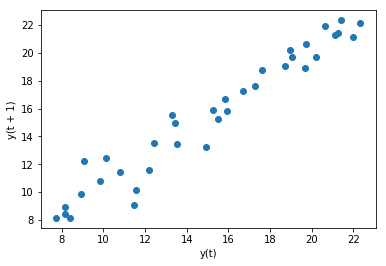

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import lag_plot

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
lag_plot(np.log(df['trans_count']))
plt.show()

# autocorrelation plots

/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


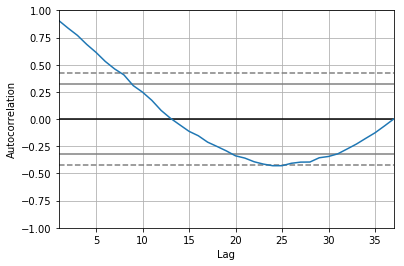

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
autocorrelation_plot(np.log(df['trans_count']))
plt.show()

# plot.ly

In [12]:
!pip install plotly

    100% |████████████████████████████████| 1.2MB 1.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/da/01/57/2b2b233add93fe4783737f0f3be1b207f3509a529f2c1a4f79
Successfully built plotly


In [13]:
import plotly.plotly as py
from plotly.graph_objs import *
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)

# Change the user and api_key to your own username and api_key
py.sign_in('username', 'api_key')

counts = np.log(df['trans_count'].values)
gpu_counts = np.log(df['gpu_trans_count'].values)

data = Data([Box(y=counts), Box(y=gpu_counts)]) 
plot_url = py.plot(data, filename='moore-law-scatter')
print(plot_url)

PlotlyError: Sign in failed.